In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines

# Optional: Use a nice matplotlib style
plt.style.use("seaborn-v0_8-whitegrid")  # or "ggplot", "bmh", etc.

# Set font sizes globally
mpl.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

# Use consistent colors or default matplotlib color cycle
colors = {
    'Fourier': '#1f77b4',    # blue
    'Radial': '#2ca02c',     # green
    'Indicator': '#d62728'   # red
}


In [29]:
with open(r'eval_data/Indicator.json', 'r') as f:
    results_indicator = json.load(f)

with open(r'eval_data/Fourier.json', 'r') as f:
    results_Fourier = json.load(f)

with open(r'eval_data/Radial.json', 'r') as f:
    results_Radial = json.load(f)

with open(r'eval_data/timeit.json', 'r') as f:
    timeit = json.load(f)

In [30]:
keys = [
        "L2 distance",
        "Total Variation",
        "KL(p || q)",
        "KL(q || p)",
        "Jensen-Shannon",
        "Cosine similarity",
    ]
key = keys[5]

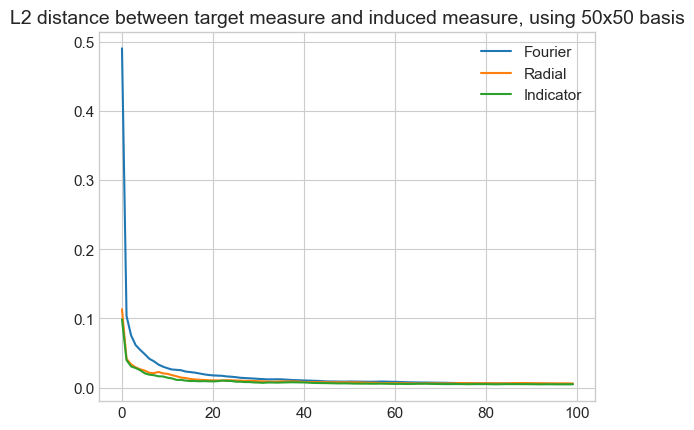

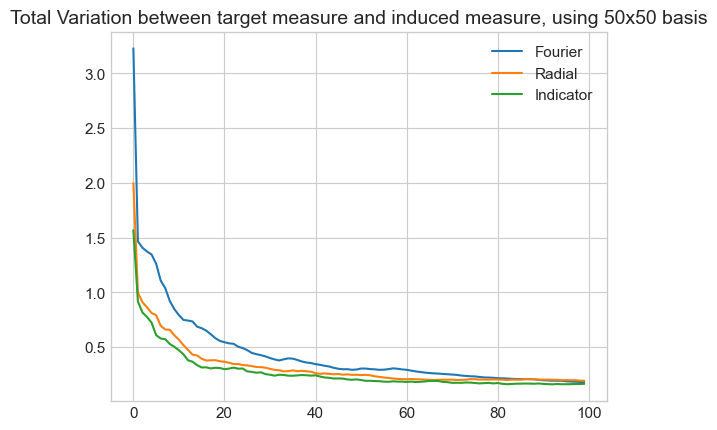

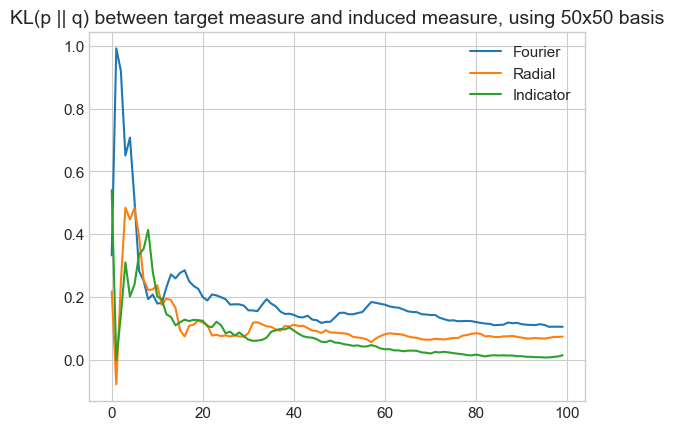

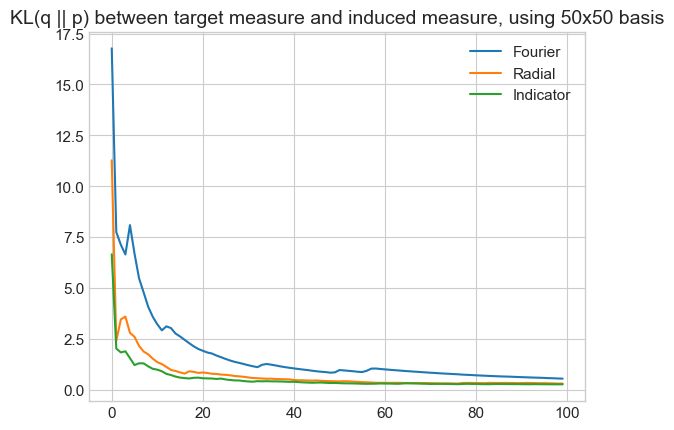

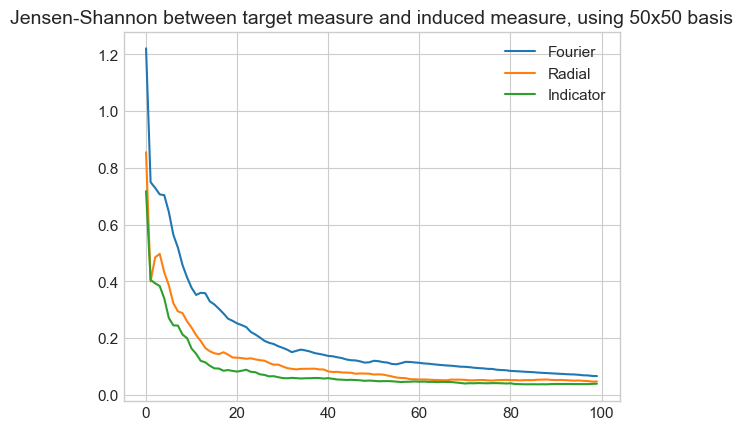

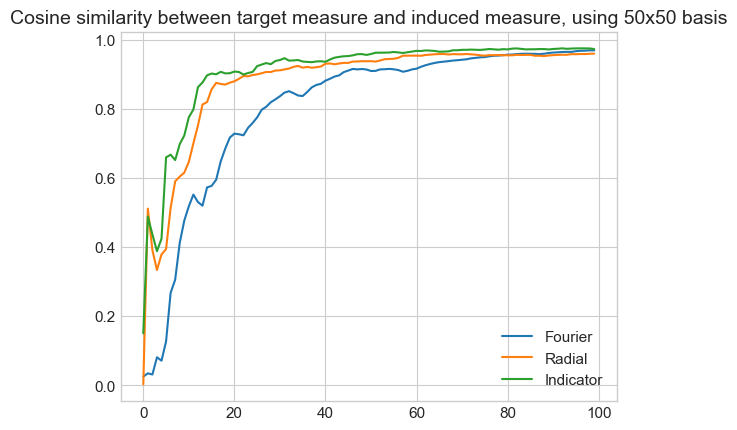

In [31]:
for key in keys:
    plot_fourier = []
    plot_radial = []
    plot_indicator = []
    for i in range(len(results_Radial)):
        plot_indicator.append(results_indicator[i][key])
        plot_radial.append(results_Radial[i][key])
        plot_fourier.append(results_Fourier[i][key])
    plt.plot(timeit, plot_fourier, label = 'Fourier')
    plt.plot(timeit, plot_radial, label = 'Radial')
    plt.plot(timeit, plot_indicator, label = 'Indicator')
    plt.title(f"{key} between target measure and induced measure, using 50x50 basis")
    plt.legend()
    plt.show()


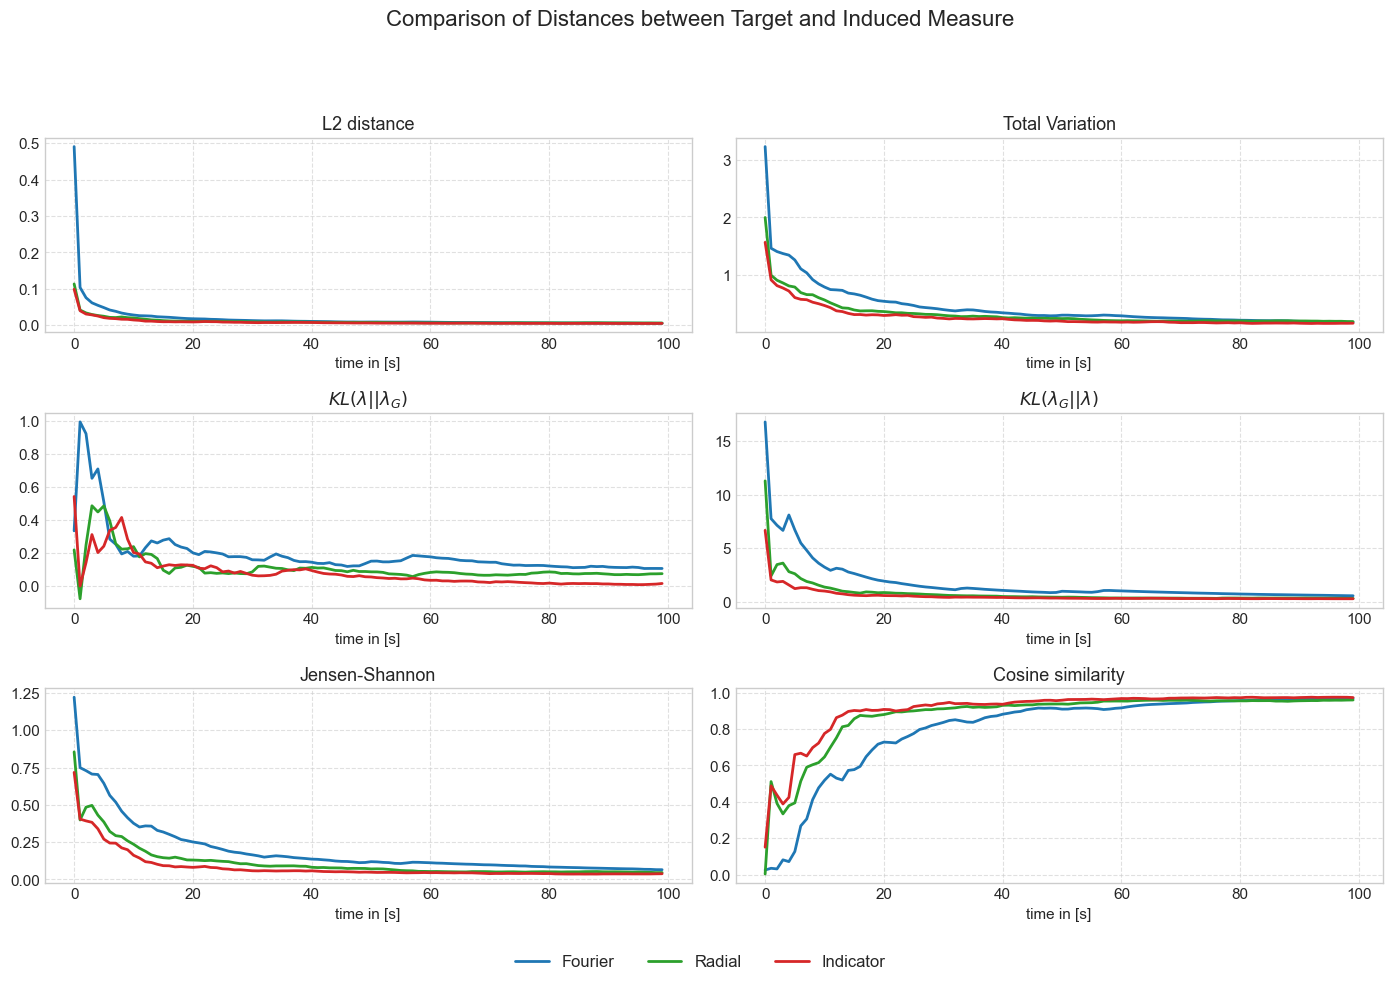

In [32]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, key in enumerate(keys):
    axs[idx].plot(timeit, [r[key] for r in results_Fourier], color=colors['Fourier'], linewidth=2)
    axs[idx].plot(timeit, [r[key] for r in results_Radial], color=colors['Radial'], linewidth=2)
    axs[idx].plot(timeit, [r[key] for r in results_indicator], color=colors['Indicator'], linewidth=2)
    if key == "KL(p || q)":
        axs[idx].set_title(r"$KL(\lambda||\lambda_G)$", fontsize=13)
    elif key == "KL(q || p)":
        axs[idx].set_title(r"$KL(\lambda_G||\lambda)$", fontsize=13)
    else:
        axs[idx].set_title(f"{key}", fontsize=13)
    axs[idx].grid(True, linestyle='--', alpha=0.6)
    axs[idx].set_xlabel("time in [s]", fontsize=11)
# Remove any empty subplot
for i in range(len(keys), len(axs)):
    fig.delaxes(axs[i])

fourier_line = mlines.Line2D([], [], color=colors['Fourier'], label='Fourier', linewidth=2)
radial_line = mlines.Line2D([], [], color=colors['Radial'], label='Radial', linewidth=2)
indicator_line = mlines.Line2D([], [], color=colors['Indicator'], label='Indicator', linewidth=2)

# Main title
fig.suptitle("Comparison of Distances between Target and Induced Measure", fontsize=16)

# Adjust layout and legend
fig.tight_layout(rect=[0, 0.05, 1, 0.93])  # Leave space at bottom for legend
fig.legend(handles=[fourier_line, radial_line, indicator_line],
           loc='lower center', ncol=3, fontsize=12, bbox_to_anchor=(0.5, 0.005))

plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt 
divergence_fourier = np.load(r"Divergence_Data/Fourier_100.npy")
divergence_sliced = np.load(r"Divergence_Data/Sliced_500.npy")
divergence_Indicator = np.load(r"Divergence_Data/Finite100.npy")

In [17]:
divergence_fourier

array([1.85974142, 0.98192311, 0.70758545, 0.55235161, 0.43341153,
       0.35867817, 0.31937962, 0.26728681, 0.23188146, 0.20163132])

In [14]:
x = np.arange(1, len(divergence_fourier)+ 1) * 10

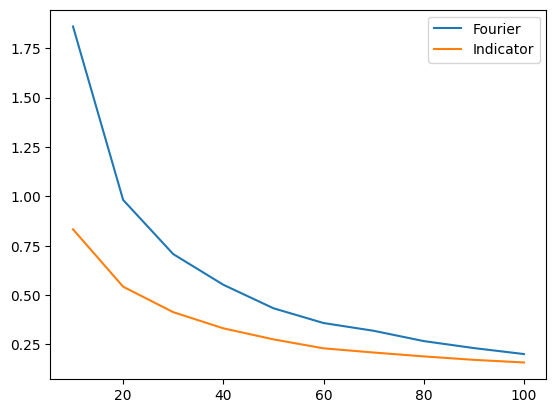

In [15]:
#plt.plot(divergence_sliced,x, label= 'Sliced')
plt.plot(x, divergence_fourier, label= 'Fourier')
plt.plot(x, divergence_Indicator, label= 'Indicator')
plt.legend()
plt.show()